In [ ]:
from qiskit import *

In [2]:
# creater quantum register
myQR = QuantumRegister(2,'mq')
# create classical register
myCR = ClassicalRegister(2,'mb')
# create circuit
myQC = QuantumCircuit(myQR, myCR)
# alternative: myQC.add_register( myQR )
# alternative: myQC.add_register( myCR )
# simplified: qc = QuantumCircuit (nqubits, nbits)

print (myQC.qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg mq[2];
creg mb[2];



OPENQASM 2.0;
include "qelib1.inc";
qreg mq[2];
creg mb[2];
h mq[0];
cx mq[0],mq[1];



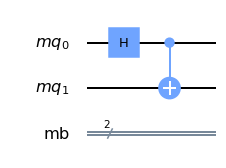

In [3]:
# gates
# circuit.gate(qubits)

# add hadamard
myQC.h(myQR[0])

# simplified: myQC.h(myQR) add hadamard to all qubits in the register

# add CNOT  cx(control, target)

myQC.cx(myQR[0],myQR[1])

# using openQASM
print (myQC.qasm())

# using mpl
myQC.draw(output='mpl')

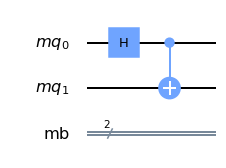

In [4]:
myQC.draw()

OPENQASM 2.0;
include "qelib1.inc";
qreg q[3];
qreg aux[1];
creg c[3];
x aux[0];
h aux[0];
h q[0];
h q[1];
h q[2];
cx q[0],aux[0];
cx q[1],aux[0];
h q[0];
h q[1];
z q[2];



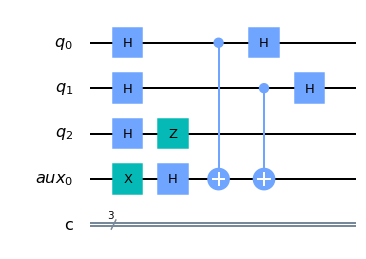

In [5]:
qreg = QuantumRegister(3, 'q')
qaux = QuantumRegister(1, 'aux')
creg = ClassicalRegister(3, 'c')
qcir = QuantumCircuit(qreg, qaux, creg)

qcir.x(qaux[0])
qcir.h(qaux[0])
qcir.h(qreg[0:3])
qcir.cx(qreg[0:2], qaux[0])
qcir.h(qreg[0:2])
qcir.z(qreg[2])

print (qcir.qasm())

qcir.draw()

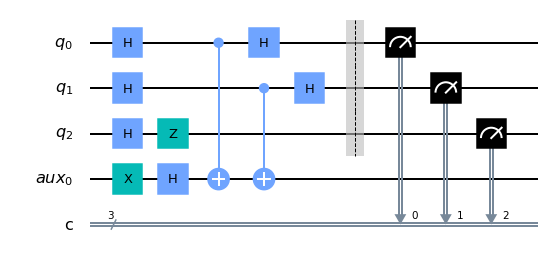

In [6]:
qcir.barrier(qreg)
qcir.measure(qreg, creg)

qcir.draw()

In [7]:
print ("# CIRCUIT INFO   #############################################################")
# https://qiskit.org/documentation/_modules/qiskit/circuit/quantumcircuit.html

print('Total number of operations:')
print(qcir.size())

print('Operations in the critical path:')
print(qcir.depth())

print('Number of qubits:')
print(qcir.n_qubits)

print('Number of qubits and classical bits:')
print(qcir.width())

print('Operations by type:')
print(qcir.count_ops())

# Number of connected components in circuit
# How many non-entangled subcircuits can the circuit be factored to.
print('Number of connected components')
print(qcir.num_connected_components())


# CIRCUIT INFO   #############################################################
Total number of operations:
13
Operations in the critical path:
6
Number of qubits:
4
Number of qubits and classical bits:
7
Operations by type:
OrderedDict([('h', 6), ('measure', 3), ('cx', 2), ('x', 1), ('z', 1), ('barrier', 1)])
Number of connected components
2


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: The QuantumCircuit.n_qubits method is deprecated as of 0.13.0, and will be removed no earlier than 3 months after that release date. You should use the QuantumCircuit.num_qubits method instead.
  # This is added back by InteractiveShellApp.init_path()


one level decomposition
OPENQASM 2.0;
include "qelib1.inc";
qreg q[3];
qreg aux[1];
creg c[3];
u2(0,pi) q[0];
u2(0,pi) q[1];
u2(0,pi) q[2];
u1(pi) q[2];
u3(pi,0,pi) aux[0];
u2(0,pi) aux[0];
cx q[0],aux[0];
u2(0,pi) q[0];
cx q[1],aux[0];
u2(0,pi) q[1];
barrier q[0],q[1],q[2];
measure q[0] -> c[0];
measure q[1] -> c[1];
measure q[2] -> c[2];



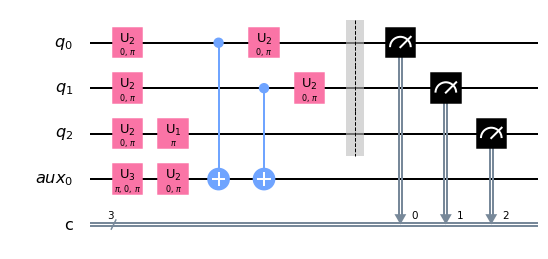

In [8]:
# call a decomposition pass on this circuit, to decompose one level
print('one level decomposition')
print (qcir.decompose().qasm())
qcir.decompose().draw()